In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

IMPORTING DATASET

In [2]:
import pandas as pd  # Import pandas

file_path = 'kc_house_data_NaN.csv'  # Make sure the file path includes the extension
data = pd.read_csv(file_path)  # Correct method to read a CSV
print(data.head())

   Unnamed: 0          id             date   price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900       3.0       1.00   
1           1  6414100192  20141209T000000  538000       3.0       2.25   
2           2  5631500400  20150225T000000  180000       2.0       1.00   
3           3  2487200875  20141209T000000  604000       4.0       3.00   
4           4  1954400510  20150218T000000  510000       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    9

In [3]:
data

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
data.tail(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,21603,7852140040,20140825T000000,507250,3.0,2.50,2270,5536,2.0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,21604,9834201367,20150126T000000,429000,3.0,2.00,1490,1126,3.0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,21605,3448900210,20141014T000000,610685,4.0,2.50,2520,6023,2.0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,21606,7936000429,20150326T000000,1007500,4.0,3.50,3510,7200,2.0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,21607,2997800021,20150219T000000,475000,3.0,2.50,1310,1294,2.0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,21608,263000018,20140521T000000,360000,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
data.dtypes

Unnamed: 0         int64
id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

GETTING OVERALL SUMMARY

In [7]:
data.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.drop(data[["id","Unnamed: 0"]],axis=1,inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
print(data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
data.shape

(21613, 20)

In [11]:
data.isnull().sum().to_frame()

,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [12]:
print("Number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


DATA PREPROCESSING

In [13]:
mean = data['bedrooms'].mean()
data['bedrooms'] = data['bedrooms'].fillna(mean)

In [14]:
mean=data['bathrooms'].mean()
data['bathrooms'] = data['bedrooms'].fillna(mean)

In [15]:
#Confirmation
print("Number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


In [16]:
print(max(data["price"]))
print(min(data['price']))

7700000
75000


In [17]:
bins=np.linspace(min(data['price']),max(data["price"]),6)
group_names=["Very-low price","low-price","medium","high-price","very-high price"]
data["Price-binned"]=pd.cut(data["price"],bins,labels=group_names,include_lowest=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price-binned
0,20141013T000000,221900,3.0,3.0,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Very-low price
1,20141209T000000,538000,3.0,3.0,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Very-low price
2,20150225T000000,180000,2.0,2.0,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Very-low price
3,20141209T000000,604000,4.0,4.0,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Very-low price
4,20150218T000000,510000,3.0,3.0,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Very-low price


In [18]:
#Creating a column of normalized price to get an overview of the price for each house
data["Normalized-price"]=((data["price"]-data["price"].min())/(data["price"].max()-data["price"].min())).astype(float)

In [19]:
unique_floors=data["floors"].value_counts()
unique_floors_data=unique_floors.to_frame()
unique_floors_data.head()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161


In [20]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price-binned,Normalized-price
0,20141013T000000,221900,3.0,3.0,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Very-low price,0.019266
1,20141209T000000,538000,3.0,3.0,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Very-low price,0.060721
2,20150225T000000,180000,2.0,2.0,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Very-low price,0.013770
3,20141209T000000,604000,4.0,4.0,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Very-low price,0.069377
4,20150218T000000,510000,3.0,3.0,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Very-low price,0.057049
5,20140512T000000,1225000,4.0,4.0,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,Very-low price,0.150820
6,20140627T000000,257500,3.0,3.0,1715,6819,2.0,0,0,3,...,0,1995,0,98003,47.3097,-122.327,2238,6819,Very-low price,0.023934
7,20150115T000000,291850,3.0,3.0,1060,9711,1.0,0,0,3,...,0,1963,0,98198,47.4095,-122.315,1650,9711,Very-low price,0.028439
8,20150415T000000,229500,3.0,3.0,1780,7470,1.0,0,0,3,...,730,1960,0,98146,47.5123,-122.337,1780,8113,Very-low price,0.020262
9,20150312T000000,323000,3.0,3.0,1890,6560,2.0,0,0,3,...,0,2003,0,98038,47.3684,-122.031,2390,7570,Very-low price,0.032525


In [21]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Price-binned', 'Normalized-price'],
      dtype='object')

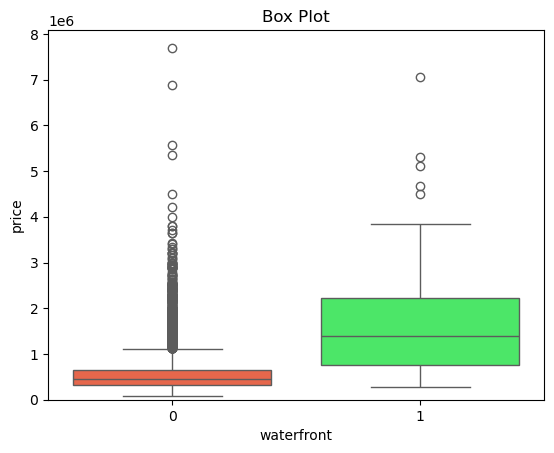

In [22]:
sns.boxplot(x="waterfront", y="price", data=data, hue="waterfront", palette=['#FF5733', "#33FF57"], dodge=False)
plt.ylim(0,)
plt.title("Box Plot")
plt.legend([], [], frameon=False)  # Remove the extra legend
plt.show()

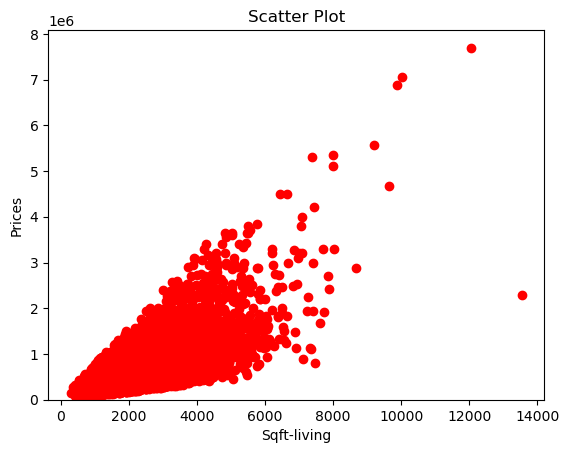

In [23]:
plt.scatter(x=data["sqft_living"],y=data["price"],color="r")
plt.ylim(0,)
plt.title("Scatter Plot")
plt.xlabel("Sqft-living")
plt.ylabel("Prices")
plt.show()

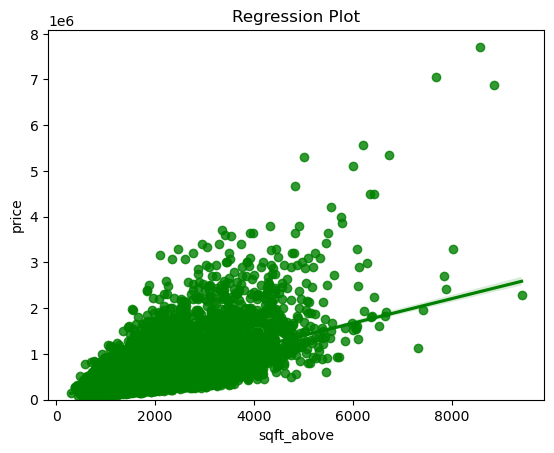

In [24]:
sns.regplot(x="sqft_above",y="price",data=data,color="g")
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-Squared value for the model is :  0.00046769430149007363


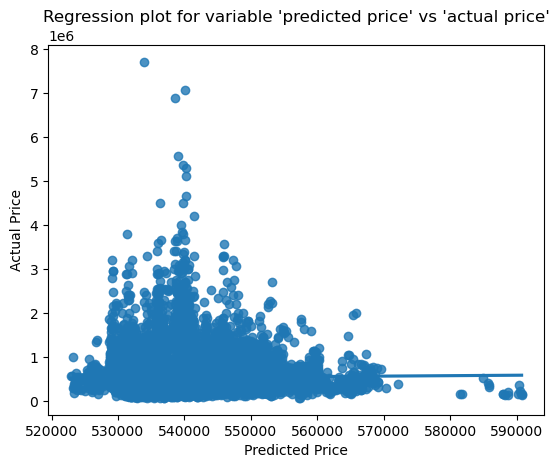

In [25]:
X = data[['long']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
yhat=lm.predict(X)
print("The predicted values are : ", yhat[0:10])
print("\nThe R-Squared value for the model is : ",lm.score(X, Y))
#Since the plot will be of two dimensions, we can plot it here!
sns.regplot(x=yhat, y=Y)
plt.title("Regression plot for variable 'predicted price' vs 'actual price'")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-squared for condition is  0.4928532179037931


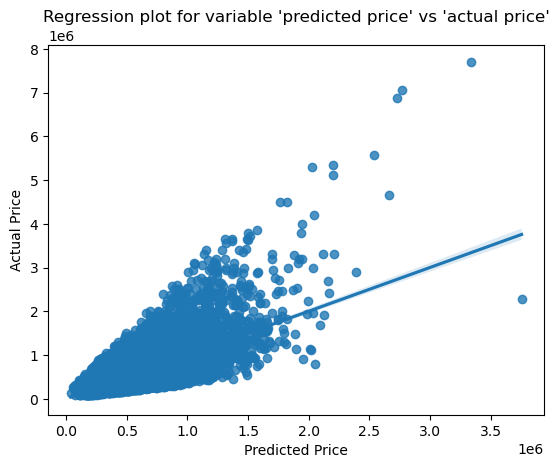

In [26]:
X2=data[["sqft_living"]]
lm.fit(X2,Y)
yhat1=lm.predict(X2)
print("The predicted values are : ",yhat[0:10])
print("\nThe R-squared for condition is ",lm.score(X2,Y))
sns.regplot(x=yhat1, y=Y)
plt.title("Regression plot for variable 'predicted price' vs 'actual price'")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [29]:
Z=data[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y=data["price"]
lm1=LinearRegression()
lm1.fit(Z,Y)
yhat2=lm1.predict(Z)
print("The predicted values are : ",yhat[0:10])
print("\nThe R-squared for condition is ",lm1.score(Z,Y))

ax1=sns.kdeplot(df["price"], label="Actual Values", color="r")
sns.kdeplot(yhat2, label="Predicted Values", color="b", ax=ax1)
plt.title("Graph of Actual and Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-squared for condition is  0.6576796645141829


NameError: name 'df' is not defined

In [30]:
print(Z.isnull().sum())  # Check for NaN values in the features
print(Y.isnull().sum())  # Check for NaN values in the target

floors           0
waterfront       0
lat              0
bedrooms         0
sqft_basement    0
view             0
bathrooms        0
sqft_living15    0
sqft_above       0
grade            0
sqft_living      0
dtype: int64
0


The predicted values are :  [537658.05923445 534162.64042347 539011.12458064 529990.68893939
 549610.13645911 551865.24536942 533711.61864141 534388.1513145
 533147.84141383 550399.42457772]

The R-squared for condition is  0.6576796645141829


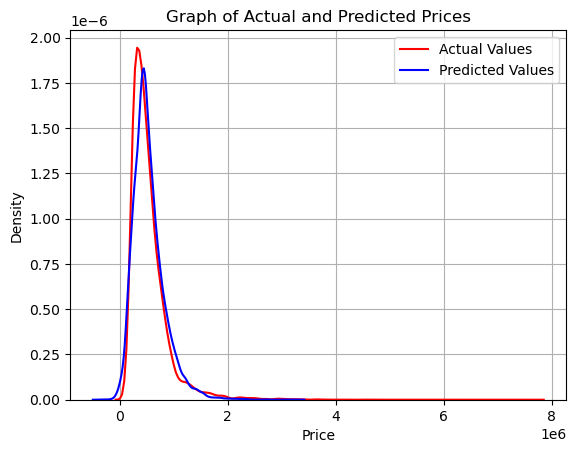

In [31]:
Z=data[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y=data["price"]
lm1=LinearRegression()
lm1.fit(Z,Y)
yhat2=lm1.predict(Z)
print("The predicted values are : ",yhat[0:10])
print("\nThe R-squared for condition is ",lm1.score(Z,Y))

ax1=sns.kdeplot(data["price"], label="Actual Values", color="r")
sns.kdeplot(yhat2, label="Predicted Values", color="b", ax=ax1)
plt.title("Graph of Actual and Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()